# **Exploración**

In [2]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import numpy as np
import datetime
import plotly.express as px

### **Conectar BD**

In [3]:
###### para ejecutar sql y conectarse a bd #####
conn=sql.connect('BD_insurance2019dataset')
cur=conn.cursor()

In [4]:
### para verificar las tablas que hay disponibles ###
pd.read_sql_query("SELECT * FROM sqlite_master; ",conn)

,type,name,tbl_name,rootpage,sql
0,table,reclamaciones,reclamaciones,2,CREATE TABLE reclamaciones (Reclamacion_Id INT...
1,table,diagnosticos,diagnosticos,3,CREATE TABLE diagnosticos (Diagnostico_Codigo ...
2,table,regional,regional,42,"CREATE TABLE regional (Regional_id INTEGER, Re..."
3,table,genero,genero,43,"CREATE TABLE genero (Sexo_Cd TEXT, Sexo_desc T..."
4,table,sociodemograficas,sociodemograficas,44,CREATE TABLE sociodemograficas (Afiliado_Id IN...
5,table,utilizaciones,utilizaciones,1328,CREATE TABLE utilizaciones (Fecha_Reclamacion ...


**Cargar Tablas**

In [5]:
utilizaciones = pd.read_sql("SELECT * FROM utilizaciones; ",conn)
reclamaciones = pd.read_sql("SELECT * FROM reclamaciones; ",conn)
regional = pd.read_sql("SELECT * FROM regional; ",conn)
genero = pd.read_sql("SELECT * FROM genero; ",conn)
sociodemograficas = pd.read_sql("SELECT * FROM sociodemograficas; ",conn)
diagnosticos = pd.read_sql("SELECT * FROM diagnosticos; ",conn)

### **Identificar campos de cruce, verificar que estén en mismo formato y duplicados**

#### **Tabla reclamaciones**

In [6]:
reclamaciones.info() # Se cuenta con 2 campos, la reclamacion_id y la reclamacion_desc
reclamaciones.duplicated().sum() #La tabla no tiene duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Reclamacion_Id    35 non-null     int64 
 1   Reclamacion_Desc  35 non-null     object
dtypes: int64(1), object(1)
memory usage: 688.0+ bytes


0

In [7]:
reclamaciones.head()  # Es una tabla descriptiva de los valores asociados en otras tablas

,Reclamacion_Id,Reclamacion_Desc
0,1,ATENCION DEL PARTO
1,2,ATENCION INTEGRAL DE SALUD MENTAL
2,3,CIRUGIA AMBULATORIA POR ACCIDENTE
3,4,CIRUGIA AMBULATORIA POR ENFERMEDAD
4,5,CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA


In [8]:
reclamaciones['Reclamacion_Desc'].value_counts() #Hay valores en minuscula y otros en mayúscula, hay datos con tilde y otros sin tilde

ATENCION DEL PARTO                                                 1
TRATAMIENTO MEDICO HOSPITALARIO POR ENFERMEDAD                     1
TRATAMIENTO AMBULATORIO POR CANCER                                 1
TRATAMIENTO MEDICO AMBULATORIO POR ACCIDENTES                      1
TRATAMIENTO MEDICO AMBULATORIO POR ENFERMEDAD EN URGENCIAS         1
TRATAMIENTO MEDICO HOSPITALARIO POR ACCIDENTE                      1
TRATAMIENTO MEDICO HOSPITALARIO POR CANCER Y COMPLICACIONES        1
TRATAMIENTO MEDICO HOSPITALARIO POR COMPLICACIONES DEL EMBARAZO    1
TRATAMIENTO MEDICO HOSPITALARIO SIQUIATRICO                        1
Sin Informacion                                                    1
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ACCIDENTE                  1
TRATAMIENTO QUIRURGICO HOSPITALARIO POR CANCER Y COMPLICACIONES    1
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD                 1
TRATAMIENTO QUIRURGICO HOSPITALARIO POR ENFERMEDAD CONGENITA       1
TRATAMIENTOS AMBULATORIOS ESPECIAL

In [12]:
from unidecode import unidecode #  Esta función convierte los caracteres a su forma sin diacríticos, lo que incluye eliminar las tildes.
reclamaciones['Reclamacion_Desc'] = reclamaciones['Reclamacion_Desc'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
reclamaciones['Reclamacion_Desc'] = reclamaciones['Reclamacion_Desc'].str.upper() #Se cambia todos los datos a mayúscula
#reclamaciones['Reclamacion_Desc'].value_counts()

#### **Tabla diagnosticos**

In [14]:
diagnosticos.info() # Se cuenta con 2 campos, el Diagnostico_Codigo  y el Diagnostico_Desc
diagnosticos.duplicated().sum() #La tabla no tiene duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2724 entries, 0 to 2723
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Diagnostico_Codigo  2724 non-null   object
 1   Diagnostico_Desc    2724 non-null   object
dtypes: object(2)
memory usage: 42.7+ KB


0

In [15]:
diagnosticos.head()

,Diagnostico_Codigo,Diagnostico_Desc
0,-1,Sin Información
1,0,DIAGNÓSTICO PENDIENTE
2,9,DIAGNÓSTICO PENDIENTE
3,A010,FIEBRE TIFOIDEA
4,A021,SEPTICEMIA DEBIDA A SALMONELLA


In [17]:
diagnosticos['Diagnostico_Desc'].value_counts()

APENDICITIS, NO ESPECIFICADA                                   2
EDEMA PULMONAR                                                 2
QUERATOSIS SEBORREICA                                          2
SÍNCOPE Y COLAPSO                                              2
CUERPO EXTRAÑO EN EL OÍDO                                      2
                                                              ..
INFARTO AGUDO DEL MIOCARDIO, SIN OTRA ESPECIFICACIÓN           1
INFARTO AGUDO DEL MIOCARDIO                                    1
INFARTO SUBSECUENTE DEL MIOCARDIO, DE PARTE NO ESPECIFICADA    1
OTRAS FORMAS DE ENFERMEDAD ISQUÉMICA AGUDA DEL CORAZÓN         1
OTROS ESTADOS POSTQUIRÚRGICOS ESPECIFICADOS                    1
Name: Diagnostico_Desc, Length: 2700, dtype: int64

In [20]:
diagnosticos['Diagnostico_Desc'] = diagnosticos['Diagnostico_Desc'].apply(lambda x: unidecode(x) if isinstance(x, str) else x)
#Se elimina tildes
#diagnosticos['Diagnostico_Desc'].value_counts()

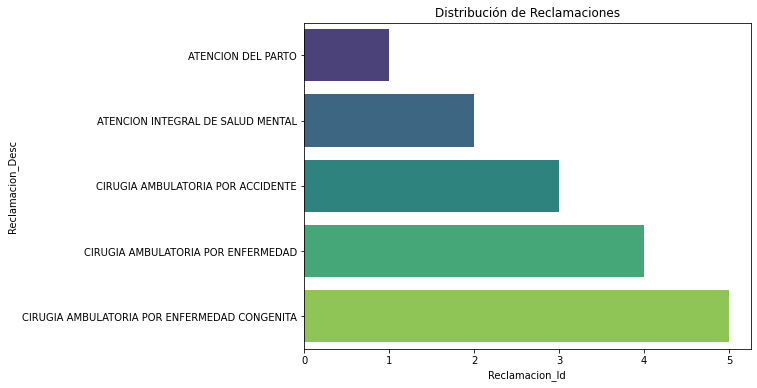

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo
reclamacion_ids = [1, 2, 3, 4, 5]
reclamacion_descs = ["ATENCION DEL PARTO", "ATENCION INTEGRAL DE SALUD MENTAL",
                     "CIRUGIA AMBULATORIA POR ACCIDENTE", "CIRUGIA AMBULATORIA POR ENFERMEDAD",
                     "CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA"]

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=reclamacion_ids, y=reclamacion_descs, palette='viridis')

# Personalizar el gráfico
plt.xlabel('Reclamacion_Id')
plt.ylabel('Reclamacion_Desc')
plt.title('Distribución de Reclamaciones')

# Mostrar el gráfico
plt.show()

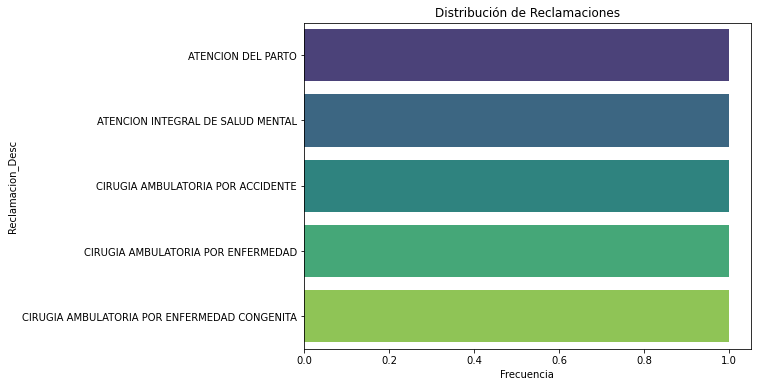

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datos de ejemplo
reclamacion_descs = ["ATENCION DEL PARTO", "ATENCION INTEGRAL DE SALUD MENTAL",
                     "CIRUGIA AMBULATORIA POR ACCIDENTE", "CIRUGIA AMBULATORIA POR ENFERMEDAD",
                     "CIRUGIA AMBULATORIA POR ENFERMEDAD CONGENITA"]

# Crear un DataFrame a partir de los datos
df = pd.DataFrame({'Reclamacion_Desc': reclamacion_descs})

# Calcular la frecuencia de cada valor de Reclamacion_Desc
frecuencia = df['Reclamacion_Desc'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencia.values, y=frecuencia.index, palette='viridis')

# Personalizar el gráfico
plt.xlabel('Frecuencia')
plt.ylabel('Reclamacion_Desc')
plt.title('Distribución de Reclamaciones')

# Mostrar el gráfico
plt.show()

#### **Tabla Género**

In [23]:
genero.info() # Se observa que tiene 2 campos, el Sexo cd y la descripción 
genero.duplicated().sum() #No se tienen duplicados 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sexo_Cd    3 non-null      object
 1   Sexo_desc  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


0

In [24]:
genero.head() # Es una tabla descriptiva de los valores asociados en otras tablas

,Sexo_Cd,Sexo_desc
0,M,Masculino
1,F,Femenino
2,-1,Sin Informacion


#### **Tabla Regional**

In [31]:
regional.info() # Se observa que tiene 2 campos, id de la región y descripción de cada región 
regional.duplicated().sum() #No se tienen duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Regional_id    6 non-null      int64 
 1   Regional_Desc  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


0

In [33]:
regional.head(6) # Es una tabla descriptiva de los valores asociados en otras tablas

,Regional_id,Regional_Desc
0,1,REGIONAL ANTIOQUIA
1,2,REGIONAL CENTRO
2,3,REGIONAL NORTE
3,4,REGIONAL OCCIDENTE
4,5,REGIONAL EJE CAFETERO
5,6,Sin Información


#### **Tabla Sociodemograficas**

In [27]:
sociodemograficas.info() # Se observa que tiene 2 campos, id de la región y descripción de cada región 
sociodemograficas.duplicated().sum() #No se tienen duplicados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218205 entries, 0 to 218204
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Afiliado_Id         218205 non-null  int64 
 1   Sexo_codigo         218205 non-null  object
 2   FechaNacimiento     218205 non-null  int64 
 3   Regional_codigo     218205 non-null  object
 4   CANCER              218205 non-null  int64 
 5   EPOC                218205 non-null  int64 
 6   DIABETES            218205 non-null  int64 
 7   HIPERTENSION        218205 non-null  int64 
 8   ENF_CARDIOVASCULAR  218205 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 15.0+ MB


0

In [28]:
sociodemograficas.head() # Es una tabla descriptiva de los valores asociados en otras tablas

,Afiliado_Id,Sexo_codigo,FechaNacimiento,Regional_codigo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,738288,M,28072,1,0,0,0,0,0
1,738294,M,23392,2,0,0,0,0,0
2,738303,F,27177,3,0,0,0,0,0
3,738318,M,15053,2,1,0,1,1,0
4,738323,F,10447,2,0,0,0,1,0


In [29]:
sociodemograficas["Regional_codigo"].value_counts()

2       106907
1        39582
4        36030
3        28259
5         7377
6           49
#N/D         1
Name: Regional_codigo, dtype: int64

In [30]:
sociodemograficas['FechaNacimiento'].min()

5146

En el sistema de numeración de fechas seriales de Excel, la fecha de serie base es el 1 de enero de 1900, representada por el número de serie 1.

In [119]:
# Aplicar la función lambda a la columna 'FechasExcel' y crear una nueva columna 'FechasConvertidas'
sociodemograficas['FechaNacimiento'] = sociodemograficas['FechaNacimiento'].apply(lambda x: datetime.datetime(1899, 12, 30) + datetime.timedelta(days=x))

In [79]:
top_5_fechas_recientes = sociodemograficas.nlargest(5, 'FechaNacimiento')['FechaNacimiento']

In [80]:
top_5_fechas_recientes #Hay que determinar que edad mínima, ya que hay muchas fechas recientes

214618   2024-04-05
28183    2023-02-25
64245    2023-01-02
167519   2022-11-01
174327   2022-08-06
            ...    
199618   2018-01-01
178835   2017-12-31
178836   2017-12-31
178881   2017-12-31
178882   2017-12-31
Name: FechaNacimiento, Length: 8000, dtype: datetime64[ns]

In [120]:
sociodemograficas

,Afiliado_Id,Sexo_codigo,FechaNacimiento,Regional_codigo,CANCER,EPOC,DIABETES,HIPERTENSION,ENF_CARDIOVASCULAR
0,738288,M,1976-11-08,1,0,0,0,0,0
1,738294,M,1964-01-16,2,0,0,0,0,0
2,738303,F,1974-05-28,3,0,0,0,0,0
3,738318,M,1941-03-18,2,1,0,1,1,0
4,738323,F,1928-08-07,2,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
218200,59559606,F,2004-06-26,2,0,0,0,0,0
218201,59564764,F,2005-03-18,2,0,0,0,0,0
218202,59565065,F,2005-03-14,2,0,0,0,0,0
218203,59570753,M,1976-03-20,4,0,0,0,0,0


In [81]:
sociodemograficas.columns

Index(['Afiliado_Id', 'Sexo_codigo', 'FechaNacimiento', 'Regional_codigo',
       'CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR'],
      dtype='object')

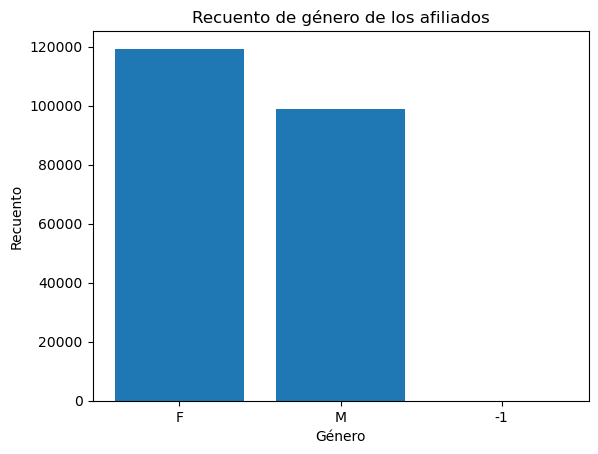

In [114]:
genero_counts = sociodemograficas['Sexo_codigo'].value_counts()

# Crear el gráfico de barras
plt.bar(genero_counts.index, genero_counts.values)

# Personalizar el gráfico
plt.xlabel('Género')
plt.ylabel('Recuento')
plt.title('Recuento de género de los afiliados')

# Mostrar el gráfico
plt.show()

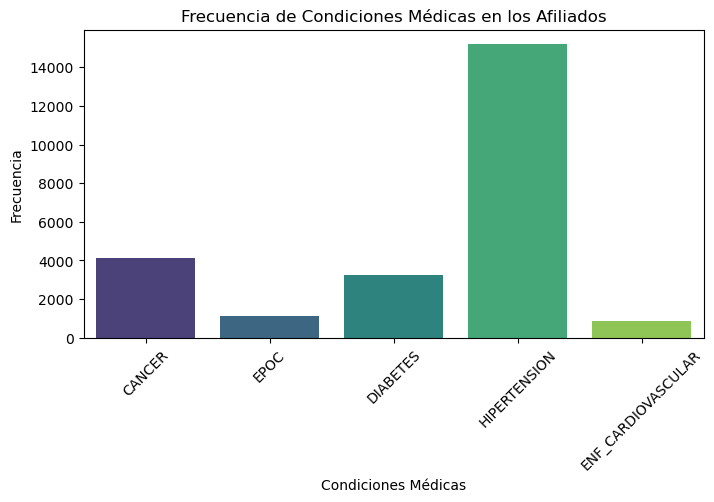

In [115]:
# Seleccionar las columnas de las condiciones médicas con iloc
condiciones_cols = sociodemograficas.iloc[:, 4:]

# Calcular la frecuencia de las condiciones médicas
condiciones_counts = condiciones_cols.sum()

# Crear el gráfico de barras apiladas
plt.figure(figsize=(8, 4))
sns.barplot(x=condiciones_counts.index, y=condiciones_counts.values, palette='viridis')

# Personalizar el gráfico
plt.xlabel('Condiciones Médicas')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Condiciones Médicas en los Afiliados')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

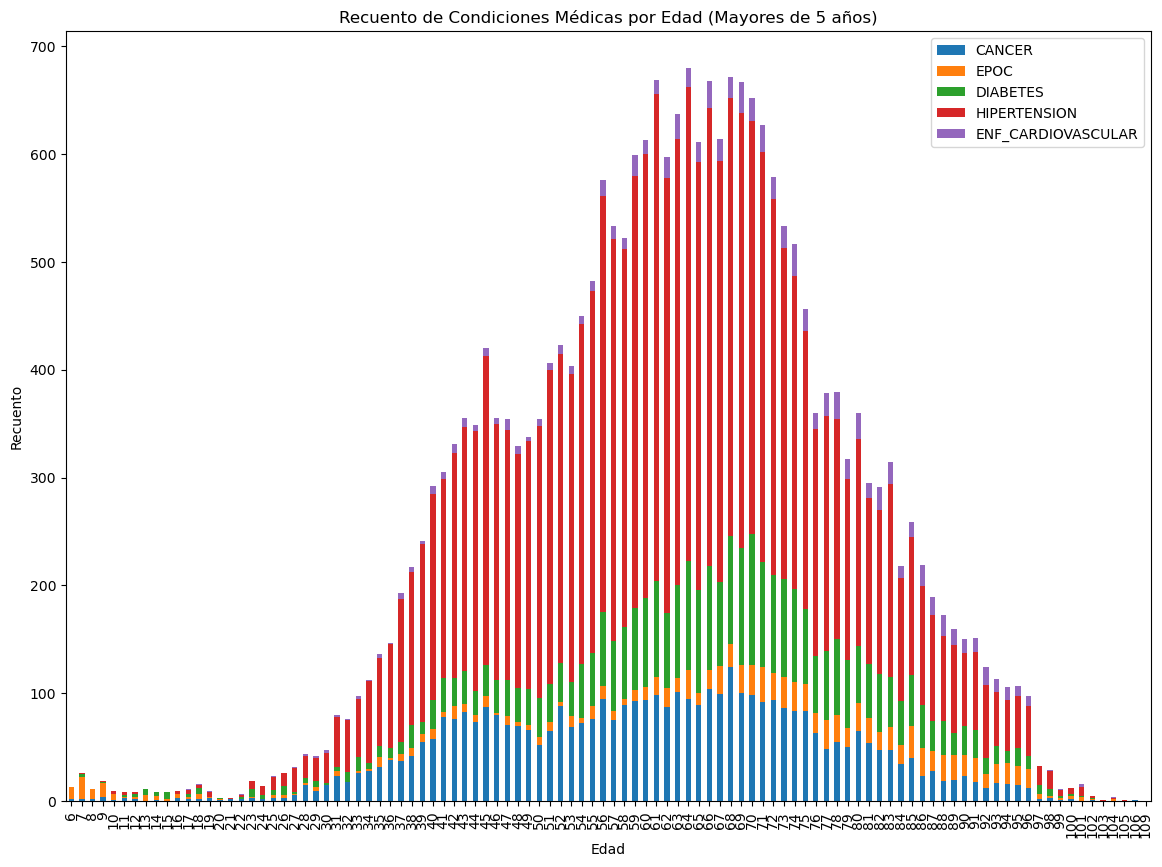

In [134]:
# Calcular la edad a partir de la fecha de nacimiento
today = pd.to_datetime('today').date()
sociodemograficas['Edad'] = today.year - sociodemograficas['FechaNacimiento'].dt.year

# Filtrar el DataFrame para incluir solo las edades mayores de 5 años
df_filtrado = sociodemograficas[sociodemograficas['Edad'] > 5]

# Seleccionar las columnas de edad y condiciones médicas
condiciones = ['CANCER', 'EPOC', 'DIABETES', 'HIPERTENSION', 'ENF_CARDIOVASCULAR']
edad_condiciones = df_filtrado[['Edad'] + condiciones]

# Calcular el recuento de condiciones médicas por edad
conteo_condiciones = edad_condiciones.groupby('Edad')[condiciones].sum()

ax = conteo_condiciones.plot(kind='bar', stacked=True)

# Personalizar el gráfico
plt.xlabel('Edad')
plt.ylabel('Recuento')
plt.title('Recuento de Condiciones Médicas por Edad (Mayores de 5 años)')

# Ajustar el tamaño del gráfico manualmente
plt.gcf().set_size_inches(14, 10)

# Mostrar el gráfico
plt.show()

Base de datos utilizaciones


In [ ]:
utilizaciones.info() # Se observa que tiene 6 campos, Fecha_Reclamacion, Afiliado_Id, Reclamacion_codigo, Diagnostico_codigo, Cantidad, Precio


In [ ]:
utilizaciones.duplicated().sum() #No se tienen duplicados


In [ ]:
utilizaciones.head() # Es una tabla que contiene las reclamaciones realizadas

In [ ]:
utilizaciones["Fecha_Reclamacion"].value_counts() 

In [ ]:
utilizaciones['Fecha_Reclamacion']=pd.to_datetime(utilizaciones["Fecha_Reclamacion"], format='%Y-%m-%d')

In [ ]:
utilizaciones['Afiliado_Id'].value_counts() 

In [ ]:
utilizaciones['Afiliado_Id'].hist()

In [ ]:
utilizaciones['Reclamacion_codigo'].value_counts() #El mayor número de reclamaciones realizadas son las de codigo 9

In [ ]:
utilizaciones['Reclamacion_codigo'].hist(rwidth=0.6)

In [ ]:
utilizaciones['Reclamacion_codigo'].min() #El codigo de menor reclamaciones realizada es el codigo 1

In [ ]:
pd.set_option("display.max_rows", None) #Este codigo se utiliza para que value counts deje ver todos los resultados

In [ ]:
utilizaciones['Reclamacion_codigo'].unique() #Existen 35 tipos de reclamaciones


In [ ]:
utilizaciones['Diagnostico_Codigo'].value_counts() #El valor 9 no es un código de diagnostico, pero debido a la cantidad de datos que tiene, se toma coo que hace referencia a sin diagnostico 

In [ ]:
utilizaciones['Cantidad'].value_counts() #La mayor cantidad de reclamaciones correspondientes a los códigos. Se asume que el valor de 1 es para todos aquellos a los que no se les tiene registrado el diagnostico.

In [ ]:
utilizaciones['Cantidad'].sort_values(ascending=False) #Las mayores cantidades de reclamaciones son 210

In [ ]:
utilizaciones['Precio'].value_counts() #Estos valores son muy altos, se debn normalizar los datos

In [ ]:
utilizaciones['Precio'].min() #El precio mínimo pagado es de 2.48 

In [ ]:
utilizaciones['Precio'].max() #El precio máximo pagado es de 541,000,682.5

In [ ]:
utilizaciones.columns

In [ ]:
df=utilizaciones.groupby(['Reclamacion_codigo'])[['Precio']].mean().reset_index()


In [ ]:
df.plot() #Los usuarios que mayor precio del seguro pagan son los que están entre los códigos 20 y 25. 

In [ ]:
df=utilizaciones.groupby(['Diagnostico_Codigo'])[['Cantidad']].sum().reset_index()

In [ ]:
df=df[df['Diagnostico_Codigo']!='9'] #El comportamiento de los clientes que si tuvieron un diagnositco

In [ ]:
df.plot() 